# Pandas
- 利用Python进行数据分析 第五章

In [7]:
from pandas import Series,DataFrame
# print dir(Series)
print '-----------------------------------------------------------------------------------------------------------'
# print dir(DataFrame)

-----------------------------------------------------------------------------------------------------------


In [1]:
import pandas as pd
print dir(pd)

['Categorical', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'ExcelFile', 'ExcelWriter', 'Expr', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int64Index', 'LooseVersion', 'MultiIndex', 'NaT', 'Panel', 'Panel4D', 'Period', 'PeriodIndex', 'Series', 'SparseArray', 'SparseDataFrame', 'SparseList', 'SparsePanel', 'SparseSeries', 'SparseTimeSeries', 'Term', 'TimeGrouper', 'TimeSeries', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'WidePanel', '__builtins__', '__doc__', '__docformat__', '__file__', '__name__', '__package__', '__path__', '__version__', '_np_version', '_np_version_under1p8', '_np_version_under1p9', '_period', '_sparse', '_testing', '_version', 'algos', 'bdate_range', 'compat', 'computation', 'concat', 'core', 'crosstab', 'cut', 'date_range', 'datetime', 'datetools', 'describe_option', 'eval', 'ewma', 'ewmcorr', 'ewmcov', 'ewmstd', 'ewmvar', 'ewmvol', 'expanding_apply', 'expanding_corr', 'expanding_corr_pairwise', 'expanding_count', 'expanding

In [1]:
from pandas import Series,DataFrame
import pandas as pd

import numpy as np
from IPython.display import Image

## 一、pandas 数据结构介绍
- 两个主要数据结构：Series、DataFrame

### 1 Series
- Series是一种类似于NumPy数组的对象，它由一组数据（各种NumPy数据类型）和与之相关的一组数据标签（即索引）组成的。
- 可以用index和values分别规定索引和值。如果不规定索引，会自动创建 0 到 N-1 索引。

In [11]:
obj = Series([4,7,-5,3])
print obj  # 索引在左边，值在右边
print obj.values # 获取其数组表示形式
print obj.index # 获取索引对象

0    4
1    7
2   -5
3    3
dtype: int64
[ 4  7 -5  3]
Int64Index([0, 1, 2, 3], dtype='int64')


In [30]:
obj = Series([4,7,-5,3],index = ['d','b','a','c'])
print obj  # 索引在左边，值在右边
print obj.index # 获取索引对象
obj.index = ['x','y','z','m'] # 修改Series对象的索引
print obj

d    4
b    7
a   -5
c    3
dtype: int64
Index([u'd', u'b', u'a', u'c'], dtype='object')
x    4
y    7
z   -5
m    3
dtype: int64


In [15]:
print obj['a'] # 通过索引获取单个值
obj['d'] = 6
print obj[['c','a','d']]  # 通过索引获取一组值

-5
c    3
a   -5
d    6
dtype: int64


In [19]:
print obj[obj>0]  # numpy数组运算都会保留索引和值之间的链接 # 布尔数组
print obj * 2  # 标量乘法
print np.exp(obj) # 数学函数

d    6
b    7
c    3
dtype: int64
d    12
b    14
a   -10
c     6
dtype: int64
d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64


In [24]:
print 'b' in obj # 将Series看成定长有序字典
print 'e' in obj

sdata = {'Ohio':35000,'Texas':71000,'Oregon':16000,'Utah':5000}
obj3 = Series(sdata)  # 直接从Python字典数据，创建Series。如果只传入一个字典，索引就是原字典的键（有序排列）
print obj3

states = ['California','Ohio','Oregon','Texas']
obj4 = Series(sdata,index = states) # 没有California，所以显示NaN（pandas中表示缺失或NA值）
print obj4

True
False
Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64
California      NaN
Ohio          35000
Oregon        16000
Texas         71000
dtype: float64


In [26]:
print pd.isnull(obj4) # 检测缺失数据 是缺失值为True
print pd.notnull(obj4) # 不是缺失值为True

print obj4.isnull() # Series中自有方法

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool
California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool


In [28]:
print obj3
print obj4
print obj3 + obj4 # 在算术运算中会自动对齐不同索引的数据

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64
California      NaN
Ohio          35000
Oregon        16000
Texas         71000
dtype: float64
California       NaN
Ohio           70000
Oregon         32000
Texas         142000
Utah             NaN
dtype: float64


In [29]:
obj4.name = 'population' # Series 对象本身及其索引都有一个name属性
obj4.index.name = 'state'
print obj4

state
California      NaN
Ohio          35000
Oregon        16000
Texas         71000
Name: population, dtype: float64


### 2 DataFrame

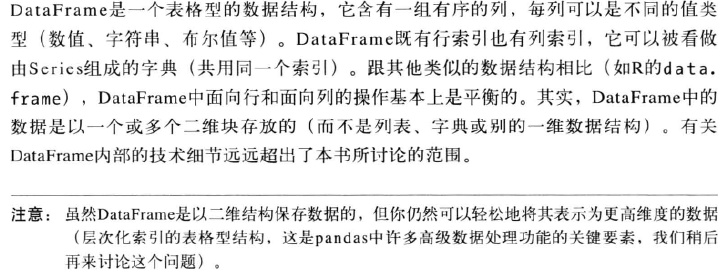

In [32]:
Image(filename="picture\DataFrame.png")

#### 2.1 由等长列表或NumPy数组组成的字典

In [2]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
       'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
       'wins': [11, 8, 10, 15, 11, 6, 10, 4],
       'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
frame = DataFrame(data) # 直接传入一个由等长列表或NumPy数组组成的字典
print frame # 自动加上索引，与Series一样，且全部列会被有序排列

   losses     team  wins  year
0       5    Bears    11  2010
1       8    Bears     8  2011
2       6    Bears    10  2012
3       1  Packers    15  2011
4       5  Packers    11  2012
5      10    Lions     6  2010
6       6    Lions    10  2011
7      12    Lions     4  2012


In [6]:
dir(data)

['__class__',
 '__cmp__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'has_key',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values',
 'viewitems',
 'viewkeys',
 'viewvalues']

In [9]:
data.keys()

['losses', 'wins', 'team', 'year']

In [34]:
print DataFrame(data,columns = ['year','losses','wins']) # 指定排序列

   year  losses  wins
0  2010       5    11
1  2011       8     8
2  2012       6    10
3  2011       1    15
4  2012       5    11
5  2010      10     6
6  2011       6    10
7  2012      12     4


In [38]:
frame2 = DataFrame(data,columns=['year','team','wins','rate'],
                  index = ['one','two','three','four','five','six','seven','eight'])
print frame2 # 找不到的数据，显示为NA值

       year     team  wins rate
one    2010    Bears    11  NaN
two    2011    Bears     8  NaN
three  2012    Bears    10  NaN
four   2011  Packers    15  NaN
five   2012  Packers    11  NaN
six    2010    Lions     6  NaN
seven  2011    Lions    10  NaN
eight  2012    Lions     4  NaN


In [40]:
print frame2['year'] # 将DataFrame的列获取为一个Series
print frame2.team # 返回的Series拥有原来的索引，且name属性也被设置好了
print frame2.ix['three'] # 通过位置或名称的方式获取行数据

one      2010
two      2011
three    2012
four     2011
five     2012
six      2010
seven    2011
eight    2012
Name: year, dtype: int64
one        Bears
two        Bears
three      Bears
four     Packers
five     Packers
six        Lions
seven      Lions
eight      Lions
Name: team, dtype: object
year     2012
team    Bears
wins       10
rate      NaN
Name: three, dtype: object


In [43]:
frame2['rate'] = 0.59 # 通过赋值方式修改列值
print frame2
frame2['rate'] = np.arange(8.) # 通过赋值方式修改列值
print frame2

       year     team  wins  rate
one    2010    Bears    11  0.59
two    2011    Bears     8  0.59
three  2012    Bears    10  0.59
four   2011  Packers    15  0.59
five   2012  Packers    11  0.59
six    2010    Lions     6  0.59
seven  2011    Lions    10  0.59
eight  2012    Lions     4  0.59
       year     team  wins  rate
one    2010    Bears    11     0
two    2011    Bears     8     1
three  2012    Bears    10     2
four   2011  Packers    15     3
five   2012  Packers    11     4
six    2010    Lions     6     5
seven  2011    Lions    10     6
eight  2012    Lions     4     7


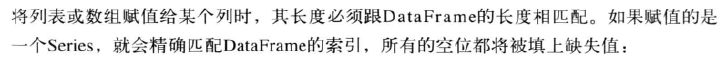

In [44]:
Image(filename="picture\DataFrame 2.png")

In [48]:
val = Series([-1.2,-1.5,-1.7],index=['two','four','six'])
frame2['RandNum'] = val # 为不存在的列赋值会创建新列
print frame2

del frame2['rate']
print frame2.columns # 通过索引方式返回的列只是相应数据的视图，而非副本。若改动，会反映到源数据上。

       year     team  wins  rate  RandNum
one    2010    Bears    11     0      NaN
two    2011    Bears     8     1     -1.2
three  2012    Bears    10     2      NaN
four   2011  Packers    15     3     -1.5
five   2012  Packers    11     4      NaN
six    2010    Lions     6     5     -1.7
seven  2011    Lions    10     6      NaN
eight  2012    Lions     4     7      NaN
Index([u'year', u'team', u'wins', u'RandNum'], dtype='object')


#### 2.2 嵌套字典（即字典的字典）

In [54]:
pop = {'Nevada':{2001:2.4,2002:2.9},
      'Ohio':{2000:1.5,2001:1.7,2002:3.6}}
frame3 = DataFrame(pop) # 外层字典的键作为列，内层键则作为行索引
print frame3

print frame3.T # 转置

print DataFrame(pop,index=[2001,2002,2003]) # 内层字典的键会被合并、排序已形成最终索引。如果指定索引就不一样了

frame3.index.name = 'year' # 设置DataFrame的index和columns的name属性
frame3.columns.name = 'state'
print frame3

      Nevada  Ohio
2000     NaN   1.5
2001     2.4   1.7
2002     2.9   3.6
        2000  2001  2002
Nevada   NaN   2.4   2.9
Ohio     1.5   1.7   3.6
      Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003     NaN   NaN
state  Nevada  Ohio
year               
2000      NaN   1.5
2001      2.4   1.7
2002      2.9   3.6


In [56]:
print frame3.values # 以二维的形式返回DataFrame中的数据
print frame2.values # 如果各列数据类型不同，会选用兼容所有列的数据类型

[[ nan  1.5]
 [ 2.4  1.7]
 [ 2.9  3.6]]
[[2010L 'Bears' 11L nan]
 [2011L 'Bears' 8L -1.2]
 [2012L 'Bears' 10L nan]
 [2011L 'Packers' 15L -1.5]
 [2012L 'Packers' 11L nan]
 [2010L 'Lions' 6L -1.7]
 [2011L 'Lions' 10L nan]
 [2012L 'Lions' 4L nan]]


### 3 索引对象

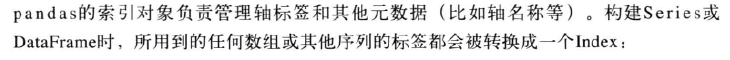

In [57]:
Image(filename="picture\Index Object.png")

In [58]:
obj = Series(range(3),index=['a','b','c'])
index = obj.index  # Index对象是不可修改的（immutable）
print index
print index[1:]

Index([u'a', u'b', u'c'], dtype='object')
Index([u'b', u'c'], dtype='object')


In [61]:
print frame3
print 'Ohio' in frame3.columns
print 2003 in frame3.index

state  Nevada  Ohio
year               
2000      NaN   1.5
2001      2.4   1.7
2002      2.9   3.6
True
False


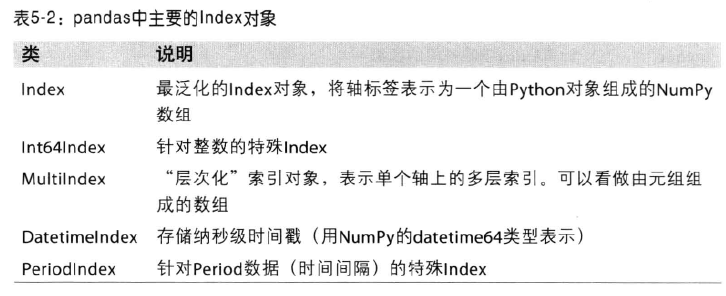

In [59]:
Image(filename="picture\Index Object 2.png")

## 二、基本功能

### 1 重新索引 reindex
- 创建一个适应新索引的新对象

In [63]:
obj = Series([4.5,7.2,-5.3,3.6],index = ['d','b','a','c'])
print obj

obj2 = obj.reindex(['a','b','c','d','e']) # 调用Series的reindex将会根据新索引进行重排。不存在值，引入缺失值
print obj2

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64
a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64


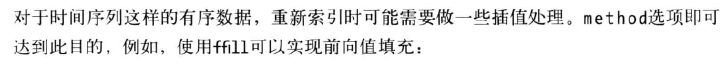

In [64]:
Image(filename="picture\Reindex.png")

In [65]:
obj3 = Series(['blue','purple','yellow'],index = [0,2,4])
print obj3.reindex(range(6),method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object


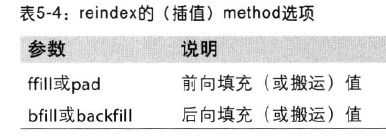

In [66]:
Image(filename="picture\Reindex 2.png")

In [72]:
frame = DataFrame(np.arange(9).reshape((3,3)),index = ['a','b','c'],
                  columns = ['Ohio','Texas','California'])
print frame

frame2 = frame.reindex(['a','b','c','d','e']) # 只传入一个序列，会重新索引行
print frame2

states = ['Texas','Utah','California']
print frame.reindex(columns = states) # 重新索引列

print frame.reindex(index = ['a','b','c','d'],method = 'ffill', # 同时重新索引行和列，插值只能按行应用（即0轴）
                    columns = states)

print frame.ix[['a','b','c','d'],states] # 利用ix的标签索引功能，更简洁

   Ohio  Texas  California
a     0      1           2
b     3      4           5
c     6      7           8
   Ohio  Texas  California
a     0      1           2
b     3      4           5
c     6      7           8
d   NaN    NaN         NaN
e   NaN    NaN         NaN
   Texas  Utah  California
a      1   NaN           2
b      4   NaN           5
c      7   NaN           8
   Texas  Utah  California
a      1   NaN           2
b      4   NaN           5
c      7   NaN           8
d      7   NaN           8
   Texas  Utah  California
a      1   NaN           2
b      4   NaN           5
c      7   NaN           8
d    NaN   NaN         NaN


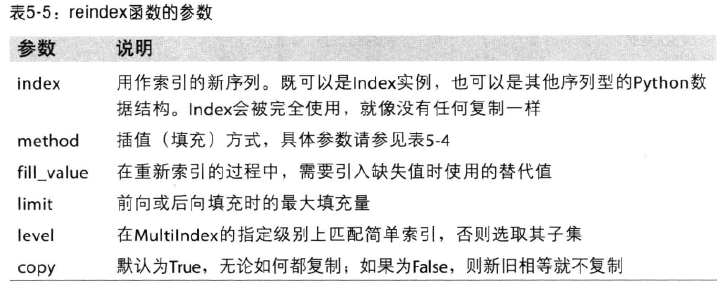

In [73]:
Image(filename="picture\Reindex 3.png")

### 2 丢弃指定轴上的项
- 只要一个索引数组或列表即可

In [74]:
obj = Series(np.arange(5.),index = ['a','b','c','d','e'])
print obj
new_obj = obj.drop('c') # drop方法 返回在指定轴上删除了指定值的新对象
print new_obj
print obj.drop(['d','c'])

a    0
b    1
c    2
d    3
e    4
dtype: float64
a    0
b    1
d    3
e    4
dtype: float64
a    0
b    1
e    4
dtype: float64


In [75]:
data = DataFrame(np.arange(16).reshape((4,4)),index = ['Ohio','Texas','California','New York'],
                  columns =['one','two','three','four'] )
print data.drop(['New York','Ohio']) # DataFrame ，可以删除任意轴上的索引值
print data.drop('two',axis = 1)

            one  two  three  four
Texas         4    5      6     7
California    8    9     10    11
            one  three  four
Ohio          0      2     3
Texas         4      6     7
California    8     10    11
New York     12     14    15


### 3 索引、选取和过滤

#### 3.1 Series
- series索引（obj[...]），类似于NumPy数组索引，只是Series的索引值不只是整数

In [78]:
obj = Series(np.arange(4.),index=['a','b','c','d'])
print obj
print obj['b']
print obj[1]
print obj[obj<2]
print obj['b':'c'] # 用标签切片与numpy切片不同，其末端是包含的（inclusive）
obj['b':'c'] = 5 # 设置
print obj

a    0
b    1
c    2
d    3
dtype: float64
1.0
1.0
a    0
b    1
dtype: float64
b    1
c    2
dtype: float64
a    0
b    5
c    5
d    3
dtype: float64


#### 3.2 DataFrame

In [83]:
data = DataFrame(np.arange(16).reshape((4,4)),index = ['Ohio','Texas','California','New York'],
                  columns =['one','two','three','four'] )
print data
print data['two'] # 获取一列
print data[['three','one']] # 获取多列

            one  two  three  four
Ohio          0    1      2     3
Texas         4    5      6     7
California    8    9     10    11
New York     12   13     14    15
Ohio           1
Texas          5
California     9
New York      13
Name: two, dtype: int32
            three  one
Ohio            2    0
Texas           6    4
California     10    8
New York       14   12


In [82]:
print data[:2]
print data[data['three'] > 5]
print data < 5
print data[data < 5]

       one  two  three  four
Ohio     0    1      2     3
Texas    4    5      6     7
            one  two  three  four
Texas         4    5      6     7
California    8    9     10    11
New York     12   13     14    15
              one    two  three   four
Ohio         True   True   True   True
Texas        True  False  False  False
California  False  False  False  False
New York    False  False  False  False
            one  two  three  four
Ohio          0    1      2     3
Texas         4  NaN    NaN   NaN
California  NaN  NaN    NaN   NaN
New York    NaN  NaN    NaN   NaN


In [88]:
print data.ix['California',['two','three']] # 索引字段ix
print data.ix[['California','Texas'],[3,0,1]]
print data.ix[2]
print data.ix[:'California','two']
print data.ix[data.three > 5, :3]

two       9
three    10
Name: California, dtype: int32
            four  one  two
California    11    8    9
Texas          7    4    5
one       8
two       9
three    10
four     11
Name: California, dtype: int32
Ohio          1
Texas         5
California    9
Name: two, dtype: int32
            one  two  three
Texas         4    5      6
California    8    9     10
New York     12   13     14


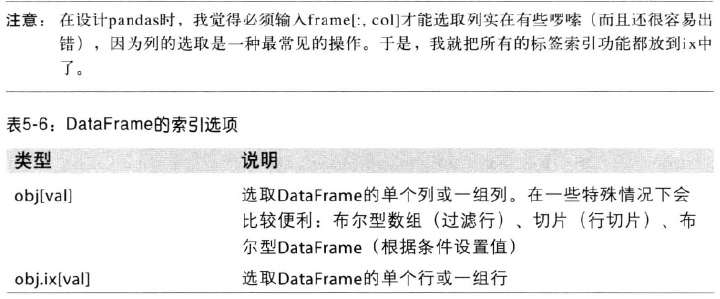

In [89]:
Image(filename="picture\Index Choose Filter.png")

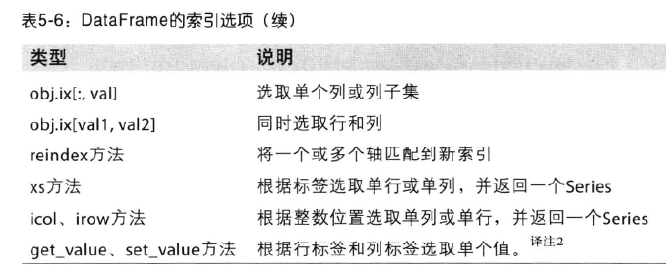

In [90]:
Image(filename="picture\Index Choose Filter 2.png")

### 4 算术运算和数据对齐

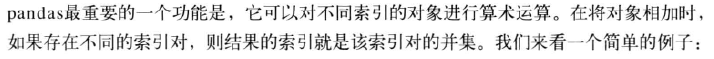

In [91]:
Image(filename="picture\Arithmetic and Data Alignment.png")

In [92]:
s1 = Series([7.3,-2.5,3.4,1.5],index = ['a','b','d','e'])
s2 = Series([-2.1,3.6,-1.5,4,3.1],index = ['a','c','e','f','g'])
print s1
print s2
print s1 + s2 # 自动对齐操作在不重叠的索引出引入了NA值

a    7.3
b   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64
a    5.2
b    NaN
c    NaN
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64


- 对于DataFrame，对齐操作会同时发生在行和列上

#### 4.1 在算术方法中填充值 
- 在对不同索引的对象进行算术运算时，可以将一个对象中某个轴标签在另一个对象中找不到时填充一个特殊值，例如0

In [98]:
df1 = DataFrame(np.arange(12.).reshape(3,4),columns = list('abcd'))
df2 = DataFrame(np.arange(20.).reshape(4,5),columns = list('abcde'))
print df1
print df2
df3 = df1+df2 # 没有重叠的位置就会产生NA值
print df3
print df1.add(df2,fill_value = 0) # 将出现NA的地方，填充为0
print df3.reindex
print df1.reindex(columns = df2.columns,fill_value = 0)

   a  b   c   d
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19
    a   b   c   d   e
0   0   2   4   6 NaN
1   9  11  13  15 NaN
2  18  20  22  24 NaN
3 NaN NaN NaN NaN NaN
    a   b   c   d   e
0   0   2   4   6   4
1   9  11  13  15   9
2  18  20  22  24  14
3  15  16  17  18  19
<bound method DataFrame.reindex of     a   b   c   d   e
0   0   2   4   6 NaN
1   9  11  13  15 NaN
2  18  20  22  24 NaN
3 NaN NaN NaN NaN NaN>
   a  b   c   d  e
0  0  1   2   3  0
1  4  5   6   7  0
2  8  9  10  11  0


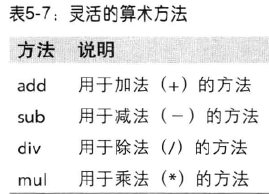

In [93]:
Image(filename="picture\Arithmetic and Data Alignment 2.png")

#### 4.2 DataFrame 和 Series 之间的运算

In [99]:
arr = np.arange(12.).reshape((3,4))
print arr
print arr[0]
print arr - arr[0]

[[  0.   1.   2.   3.]
 [  4.   5.   6.   7.]
 [  8.   9.  10.  11.]]
[ 0.  1.  2.  3.]
[[ 0.  0.  0.  0.]
 [ 4.  4.  4.  4.]
 [ 8.  8.  8.  8.]]


In [101]:
frame = DataFrame(np.arange(12.).reshape((4,3)),columns = list('bde'),
                 index = ['Ohio','Texas','California','New York'])
series = frame.ix[0]
print frame
print series

            b   d   e
Ohio        0   1   2
Texas       3   4   5
California  6   7   8
New York    9  10  11
b    0
d    1
e    2
Name: Ohio, dtype: float64


In [105]:
print frame - series # 默认将Series的索引匹配到DataFrame的列
series2 = Series(range(3),index=['b','e','f'])
print series2
print frame + series2 # 如果某个索引值找不到，参与运算的两个对象将会被重新索引以形成并集
series3 = frame['d']
print series3
print frame.sub(series3,axis=0) # 如果希望匹配行且在列上广播，则需用算术运算方法

            b  d  e
Ohio        0  0  0
Texas       3  3  3
California  6  6  6
New York    9  9  9
b    0
e    1
f    2
dtype: int64
            b   d   e   f
Ohio        0 NaN   3 NaN
Texas       3 NaN   6 NaN
California  6 NaN   9 NaN
New York    9 NaN  12 NaN
Ohio           1
Texas          4
California     7
New York      10
Name: d, dtype: float64
            b  d  e
Ohio       -1  0  1
Texas      -1  0  1
California -1  0  1
New York   -1  0  1


### 5 函数应用和映射

In [107]:
frame = DataFrame(np.random.randn(12.).reshape((4,3)),columns = list('bde'),
                 index = ['Ohio','Texas','California','New York'])
print frame
print np.abs(frame)

                   b         d         e
Ohio       -0.039305  0.894480 -1.239304
Texas      -1.942022  1.712829 -0.666320
California -0.121233  0.029523 -0.436922
New York    1.621757 -0.141680 -0.979678
                   b         d         e
Ohio        0.039305  0.894480  1.239304
Texas       1.942022  1.712829  0.666320
California  0.121233  0.029523  0.436922
New York    1.621757  0.141680  0.979678


D:\software\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [108]:
f = lambda x:x.max() - x.min() # 将函数应用到由各列或行所形成的一维数组上
print frame.apply(f)
print frame.apply(f,axis = 1)

b    3.563779
d    1.854509
e    0.802382
dtype: float64
Ohio          2.133783
Texas         3.654851
California    0.466445
New York      2.601435
dtype: float64


In [109]:
def f(x):
    return Series([x.min(),x.max()],index = ['min','max'])

frame.apply(f) # 传递给apply的函数可以返回由多个值组成的Series

,b,d,e
min,-1.942022,-0.141680,-1.239304
max,1.621757,1.712829,-0.436922


In [111]:
format = lambda x:'%.2f' %x
print frame.applymap(format) # DataFrame 得到frame中各个浮点值的格式化字符串
print frame['e'].map(format) # Series 

                b      d      e
Ohio        -0.04   0.89  -1.24
Texas       -1.94   1.71  -0.67
California  -0.12   0.03  -0.44
New York     1.62  -0.14  -0.98
Ohio          -1.24
Texas         -0.67
California    -0.44
New York      -0.98
Name: e, dtype: object


### 6 排序和排名 sort and rank

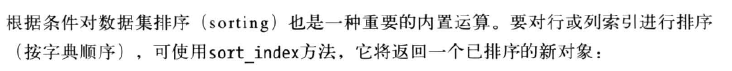

In [125]:
Image(filename="picture\Sort.png")

In [119]:
obj = Series(range(4),index=['d','a','b','c'])
print obj
print obj.sort_values() # 对行或列索引进行排序（按字典顺序）
obj = Series([4,7,-3,2])
print obj.sort_values() # 按值对Series进行排序。若有缺失值，默认放在末尾

d    0
a    1
b    2
c    3
dtype: int64
d    0
a    1
b    2
c    3
dtype: int64
2   -3
3    2
0    4
1    7
dtype: int64


In [124]:
frame = DataFrame(np.arange(8).reshape((2,4)),index = ['three','one'],
                 columns = ['d','a','b','c'])
print frame
print frame.sort_index() # 默认按行排序 # 用sort_values会出错
print frame.sort_index(axis = 1) # 按列排序
print frame.sort_index(axis = 1, ascending = False) # 默认升序，这里降序

       d  a  b  c
three  0  1  2  3
one    4  5  6  7
       d  a  b  c
one    4  5  6  7
three  0  1  2  3
       a  b  c  d
three  1  2  3  0
one    5  6  7  4
       d  c  b  a
three  0  3  2  1
one    4  7  6  5


In [121]:
frame = DataFrame({'b':[4,7,-3,2],'a':[0,1,0,1]})
print frame
print frame.sort_values(by = 'b')
print frame.sort_values(by=['a','b']) # 根据特定的一列或多列进行排序

   a  b
0  0  4
1  1  7
2  0 -3
3  1  2
   a  b
2  0 -3
3  1  2
0  0  4
1  1  7
   a  b
2  0 -3
0  0  4
3  1  2
1  1  7


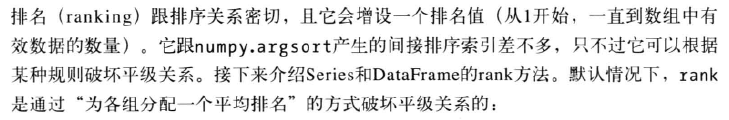

In [126]:
Image(filename="picture\Rank.png")

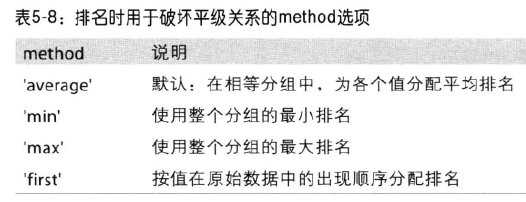

In [127]:
Image(filename="picture\Rank 2.png")

### 7 带有重复值的轴索引

In [129]:
obj = Series(range(5),index = ['a','a','b','b','c'])
print obj
print obj.index.is_unique # 索引值是否是唯一的
print obj['a']
print obj['c']

a    0
a    1
b    2
b    3
c    4
dtype: int64
False
a    0
a    1
dtype: int64
4


In [130]:
df = DataFrame(np.random.randn(4,3),index = ['a','a','b','b'])
print df
print df.ix['b']

          0         1         2
a -0.182568  1.993085  0.602551
a  0.177176 -0.387581  0.256535
b -1.292285  0.040677  0.442385
b -0.910019 -0.760956  0.059870
          0         1         2
b -1.292285  0.040677  0.442385
b -0.910019 -0.760956  0.059870


## 三、汇总和计算描述统计

### 1 约简方法

### 2 描述和汇总统计

### 3 相关系数与协方差

### 4 唯一值、值计数以及成员资格

## 四、处理缺失数据

### 1 滤除缺失数据

### 2 填充缺失数据

## 五、层次化索引

### 1 重排分级顺序

### 2 根据级别汇总统计

### 3 使用 DataFrame 的列

## 六其他和pandas有关的话题

### 1 整数索引

### 2 面板数据